# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---

# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
# ISOTERMA DE 20°C DE LA BOYA UBICADA EN 0°N - 170°W

---

In [85]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/OCEANOGRAFIA/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [86]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
isot_20 = xr.open_dataset(path + 'iso0n170w_dy.cdf',drop_variables=['QI_5006'])
isot_20['time'] = pd.date_range(isot_20.time[0].values, isot_20.time[-1].values, freq = 'D')
isot_20

<xarray.Dataset>
Dimensions:  (time: 11655, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1992-02-20T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 0.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 190.0
Data variables:
    ISO_6    (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                06:19 19-JAN-2024

In [88]:
# Calculamos la climatología diario (promedio histórico) de 30 años consecutivos
Inicio = '1991-01-01'
Fin = '2020-12-31'
isot_20_clim = isot_20.sel(time=slice(Inicio, Fin)).groupby('time.dayofyear').mean(dim='time')

# Transformamos a dataframe y nos quedamos con una serie de tiempo (eliminamos 'depth','lat','lon')
isot_20_df_clim = isot_20_clim.to_dataframe().reset_index()\
.drop(['depth','lat','lon'], axis=1).set_index('dayofyear').reset_index().drop('dayofyear', axis=1)

# Duplicamos y renombramos la columna
isot_20_df_clim = pd.concat([isot_20_df_clim] * 2, ignore_index=True).rename(columns = {'ISO_6' : 'ISO_6_Clim'})
isot_20_df_clim

,ISO_6_Clim
0,163.828842
1,165.480515
2,166.354935
3,166.475296
4,167.952560
...,...
727,165.005859
728,163.754059
729,164.605286
730,164.540665


In [89]:
# round(isot_20_df_clim.describe().loc[['max', 'min', 'mean', 'std']],2)

In [90]:
# Este paso conviene para quedarnos con los índices de todos los años
isot_20_df = isot_20.to_dataframe().reset_index().drop(['depth','lat','lon'], axis=1).set_index('time')
isot_20_df

,ISO_6
time,
1992-02-20 12:00:00,123.792542
1992-02-21 12:00:00,121.677216
1992-02-22 12:00:00,NaN
1992-02-23 12:00:00,NaN
1992-02-24 12:00:00,NaN
...,...
2024-01-13 12:00:00,142.288727
2024-01-14 12:00:00,145.850891
2024-01-15 12:00:00,141.658142


In [91]:
YearsUnidos_df = pd.DataFrame()
ListaYears = [1997, 1998, 2016, 2017, 2022, 2023] # Los años a analizar

for i in range(0, len(ListaYears), 2):
  Col1 = str(ListaYears[i])
  Col2 = str(ListaYears[i+1])
  Cols = isot_20_df.loc[Col1:Col2].reset_index().drop(['time'],axis=1)
  YearsUnidos_df = pd.concat([YearsUnidos_df, Cols], axis = 1)\
  .rename(columns = {'ISO_6' : f'ISO_6_{Col1}_{Col2}'})
YearsUnidos_df

,ISO_6_1997_1998,ISO_6_2016_2017,ISO_6_2022_2023
0,183.680099,170.476303,187.734512
1,183.944366,167.744370,191.439117
2,181.589676,160.760773,194.824844
3,181.925919,161.976593,201.982376
4,199.553589,170.932693,193.727188
...,...,...,...
726,158.579895,182.599838,156.100052
727,155.674530,184.700897,159.517288
728,149.193542,180.522903,158.266083
729,143.648209,181.273987,153.921478


In [92]:
# Ahora vamos unir los dataframe : alt_din_df_clim y YearsUnidos_df
df = pd.concat([isot_20_df_clim, YearsUnidos_df], axis = 1)
df

,ISO_6_Clim,ISO_6_1997_1998,ISO_6_2016_2017,ISO_6_2022_2023
0,163.828842,183.680099,170.476303,187.734512
1,165.480515,183.944366,167.744370,191.439117
2,166.354935,181.589676,160.760773,194.824844
3,166.475296,181.925919,161.976593,201.982376
4,167.952560,199.553589,170.932693,193.727188
...,...,...,...,...
727,165.005859,155.674530,184.700897,159.517288
728,163.754059,149.193542,180.522903,158.266083
729,164.605286,143.648209,181.273987,153.921478
730,164.540665,NaN,178.886185,NaN


In [93]:
# round(YearsUnidos_df.describe().loc[['max', 'min', 'mean', 'std']],2)

In [94]:
import matplotlib.dates as mdates
def ISOT20_vs_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  barras = ax.bar(data.index,data.iloc[:,0], color ='lightsteelblue', label = 'Prom. Histórico',zorder = 0,width = 1)
  barras = ax.plot(data.index,data[data.columns[i]],color ='tomato', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)
  # =============================================================================
  min_value = int((data.min().min() - 10) / 10) * 10
  max_value = int((data.max().max() + 10) / 10) * 10

  ax.set_ylim(min_value, max_value)
  ax.set_yticks(range(int(min_value), int(max_value)+ 10, 10))
  ax.invert_yaxis()
  # =============================================================================
  ax.set_title(f"Isoterma de 20°C: Histórico (1991-2020) vs {year}\nBoya: {isot_20.attrs['site_code']}",fontsize=12, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='gainsboro', linestyle='--',alpha=0.5)
  ax.legend(loc='best', fontsize=10, labelcolor='black')
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  ax.set_ylabel('Depth [m]', fontsize=10)

  plt.text(0, -0.25, 'Fuente de datos: NOAA [TAO/TRITON]', fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  #-----------------------------------------------------------------------------------------
  # fig.savefig(path + f"ISOT_{isot_20.attrs['site_code']}_{year}.jpg",
  #                 transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

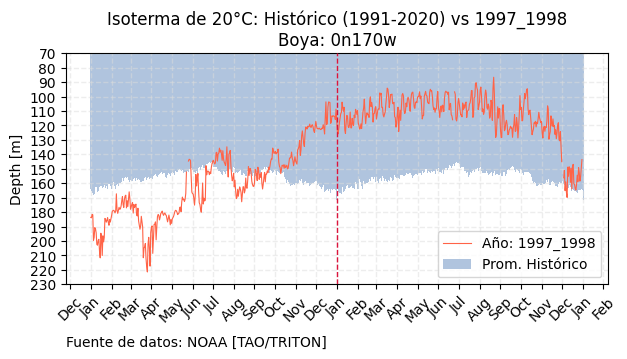

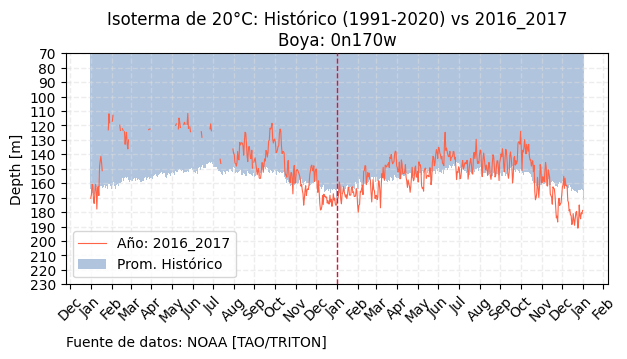

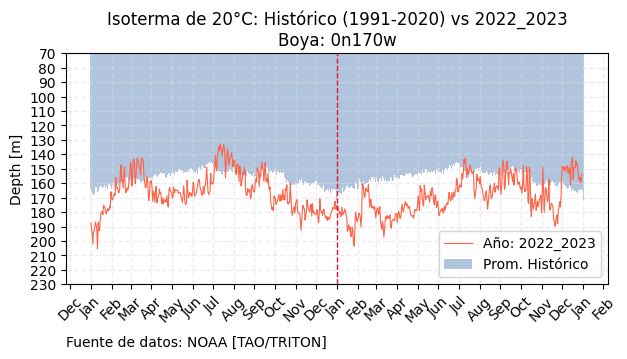

In [95]:
for i in range(1,len(df.columns)):
  ISOT20_vs_year(df,df.columns[i].split("ISO_6_")[1])

# ANOMALÍAS

In [96]:
# Calculamos las anomalías diarias
isot_20_anom = isot_20.groupby('time.dayofyear') - isot_20_clim
isot_20_anom

<xarray.Dataset>
Dimensions:    (time: 11655, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time       (time) datetime64[ns] 1992-02-20T12:00:00 ... 2024-01-17T12:00:00
  * depth      (depth) float32 0.0
  * lat        (lat) float32 0.0
  * lon        (lon) float32 190.0
    dayofyear  (time) int64 51 52 53 54 55 56 57 58 ... 10 11 12 13 14 15 16 17
Data variables:
    ISO_6      (time, depth, lat, lon) float32 -32.42 -34.15 ... -22.89 -32.36

In [97]:
# Transformamos a dataframe y nos quedamos con una serie de tiempo (eliminamos 'depth','lat','lon')
isot_20_anom_df = isot_20_anom.to_dataframe().reset_index().drop(['depth','lat','lon','dayofyear'], axis=1).set_index('time')
isot_20_anom_df

,ISO_6
time,
1992-02-20 12:00:00,-32.421646
1992-02-21 12:00:00,-34.145172
1992-02-22 12:00:00,NaN
1992-02-23 12:00:00,NaN
1992-02-24 12:00:00,NaN
...,...
2024-01-13 12:00:00,-21.438080
2024-01-14 12:00:00,-16.864639
2024-01-15 12:00:00,-20.188171


In [98]:
# round(df_Anom.describe().loc[['max', 'min', 'mean', 'std']],2)

In [99]:
Lista_Anom = []
for i in range(0, len(ListaYears), 2):
  Col1 = str(ListaYears[i])
  Col2 = str(ListaYears[i+1])
  Cols = isot_20_anom_df.loc[Col1:Col2].reset_index().drop(['time'],axis=1)
  Anom = Cols.rename(columns = {'ISO_6' : f'ISO_6_Anom_{Col1}_{Col2}'})
  Lista_Anom.append(Anom)
df_Anom = pd.concat(Lista_Anom, axis=1)
df_Anom

,ISO_6_Anom_1997_1998,ISO_6_Anom_2016_2017,ISO_6_Anom_2022_2023
0,19.851257,6.647461,23.905670
1,18.463852,2.263855,25.958603
2,15.234741,-5.594162,28.469910
3,15.450623,-4.498703,35.507080
4,31.601028,2.980133,25.774628
...,...,...,...
726,-6.425964,18.373856,-8.905807
727,-8.079529,19.695038,-4.236771
728,-15.411743,16.768845,-6.339203
729,-20.892456,16.668701,-10.619186


In [100]:
# round(df_Anom.describe().loc[['max', 'min', 'mean', 'std']],2)

In [101]:
def ISOT20_Anom_year(data,year):
  fig, ax = plt.subplots(figsize=(9,3))
  barras = ax.plot(data.index,data[data.columns[i]],color ='cornflowerblue', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)
  ax.set_ylabel('Depth [m]',fontsize=10)
  # #-----------------------------------------------------------------------------------------
    # ESTILO :V
  # Agregar el nombre del mes al título
  ax.set_title(f"Anomalías de Isoterma 20°C: Año {year}\nBoya: {isot_20.attrs['site_code']}",fontsize=12, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='silver', linestyle='--',alpha=0.5)
  plt.axhline(y=0, color='red', linestyle='-',linewidth=0.8)

  min_value = int((data.min().min() - 10) / 10) * 10
  max_value = int((data.max().max() + 10) / 10) * 10


  ax.set_ylim(min_value, max_value)
  ax.set_yticks(range(int(min_value), int(max_value)+10, 10))
  ax.invert_yaxis()

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)

  plt.text(0, -0.25, 'Fuente de datos: NOAA [TAO/TRITON]',fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  # #-----------------------------------------------------------------------------------------
  # fig.savefig(path + f"ISOT_Anom_{isot_20.attrs['site_code']}_{year}.jpg",
  #                 transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

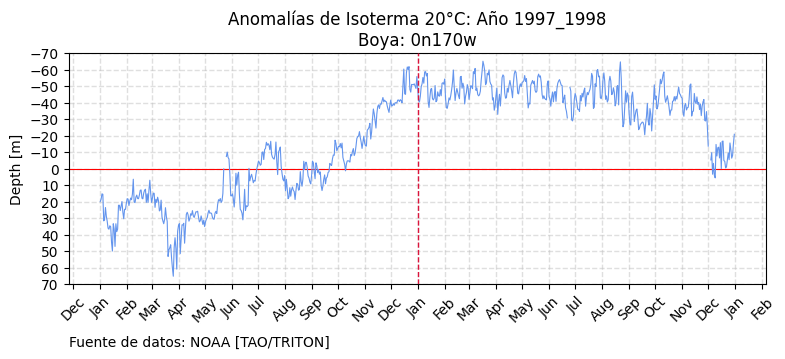

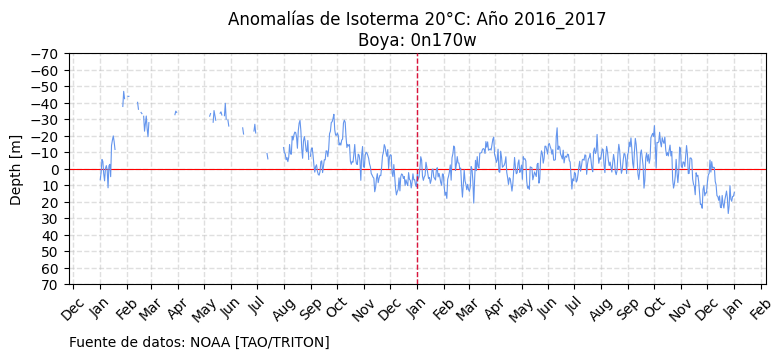

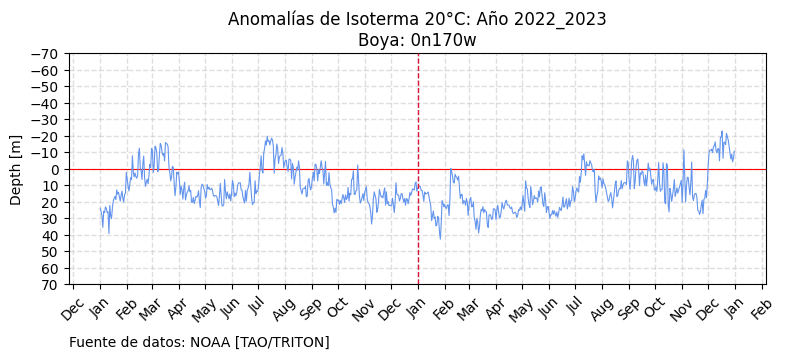

In [102]:
for i in range(0,len(df_Anom.columns)):
  ISOT20_Anom_year(df_Anom,df_Anom.columns[i].split("ISO_6_Anom_")[1])


---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---